<a href="https://colab.research.google.com/github/jamartinezv2020/teac/blob/main/01_Proyecto_Final_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://githubtocolab.com/Joanri20/mss_energy_project/blob/trunk/01_Proyecto_DataSet_World_Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# **Credit Card Customer Churn Prediction**


##**Experimento**

In [ ]:
# Cargue del archivo y de las librerias
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
from progressbar import progressbar as pbar
from local.lib import mlutils
%matplotlib inline
from zipfile import ZipFile
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import utils
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, ShuffleSplit

replicating local resources


In [ ]:
datos = pd.read_csv("https://raw.githubusercontent.com/Joanri20/modelosysimulaciondos/trunk/churn.csv")
datos

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,73,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Calcular el promedio de valores nulos por columna en el DataFrame 'datos'
promedio_valores_nulos_por_columna = datos.isnull().mean() * 100

# Mostrar el resultado
print(promedio_valores_nulos_por_columna)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


Existe una columna que tiene datos faltantes por lo tanto se llenarán con la media

In [ ]:
media_columna = datos['TotalCharges'].mean()
datos['TotalCharges'].fillna(media_columna, inplace=True)

## Preparación de la Data. Etiquetar variables

Aqui las variables categoricas se transforman en númericas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Cargar los datos
df = datos.copy()

# Seleccionar las columnas numéricas y categóricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df.select_dtypes(exclude=[np.number]).columns.tolist()

#Se elimina la columna de salida
columnas_categoricas.remove('Churn')

#Se trasnforman las variables predictoras que son categoricas en númericas
label_encoders = {}
for col in columnas_categoricas:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Transformar en númerica la variables de salida
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Churn'])  # Variable de salida

#Se combinan las númericas y las categoricas en una sola varaible X
columnas_predictoras = columnas_numericas + columnas_categoricas
X = df[columnas_predictoras]  # Variables predictoras

## Preprocesado de datos


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalizar las variables predictoras
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


#Divide los datos para entrenamiento Bootstrap80% y test 20%
X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(X, y, test_size=0.2, random_state=42)

## **Funciones Discriminantes Gaussianas**  (Gaussian Discriminant Analysis - GDA)

Utilizando validacion bootstrap para los modelos FDG donde hay 3 tipos: Sacado de la siguiente fuente: [Link](https://colab.research.google.com/github/jdariasl/ML_2020/blob/master/Clase%2003%20-%20Funciones%20discriminantes%20Gausianas.ipynb#scrollTo=oHQ2boOqZ4jM)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
#CASO 1 : matrices de covarianza se consideran de la forma  Σ=σ2I , donde  I  es la matriz identidad.

#Entrenar el modelo
fdgC1 = LinearDiscriminantAnalysis()
fdgC1.fit(X_train_bootstrap, y_train_bootstrap)

#Evaluar el modelo
# Hacer predicciones
y_pred = fdgC1.predict(X_test_bootstrap)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print(f'Accuracy FDG Caso 1: {accuracy}')

# Mostrar el reporte de clasificación (métricas detalladas por clase)
print('FDG Caso 1:')
print(classification_report(y_test_bootstrap, y_pred))

#***************************************
print("****************************************")
#CASO 2 : Las matrices de covarianza se consideran diagonales
#Entrenar el modelo
fdgC2 = GaussianNB()
fdgC2.fit(X_train_bootstrap, y_train_bootstrap)

#Evaluar el modelo
# Hacer predicciones
y_pred = fdgC2.predict(X_test_bootstrap)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print(f'Accuracy FDG Caso 2: {accuracy}')

# Mostrar el reporte de clasificación (métricas detalladas por clase)
print('FDG Caso 2:')
print(classification_report(y_test_bootstrap, y_pred))

#***************************************
print("****************************************")
#CASO 3 :  Las matrices de covarianza de los modelos se consideran completas y las clases se consideran agrupadas en parábolas cuyo eje principal puede estar en cualquier dirección
#Entrenar el modelo
fdgC3 = QuadraticDiscriminantAnalysis()
fdgC3.fit(X_train_bootstrap, y_train_bootstrap)

#Evaluar el modelo
# Hacer predicciones
y_pred = fdgC3.predict(X_test_bootstrap)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print(f'Accuracy FDG Caso 3: {accuracy}')

# Mostrar el reporte de clasificación (métricas detalladas por clase)
print('FDG Caso 3:')
print(classification_report(y_test_bootstrap, y_pred))

Accuracy FDG Caso 1: 0.8168914123491838
FDG Caso 1:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

****************************************
Accuracy FDG Caso 2: 0.758694109297374
FDG Caso 2:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.78      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409

****************************************
Accuracy FDG Caso 3: 0.7700496806245565
FDG Caso 3:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036


## **FDG con Validación Cruzada**

In [ ]:
#CASO 1 : matrices de covarianza se consideran de la forma  Σ=σ2I , donde  I  es la matriz identidad.
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Usar validación cruzada
k_fold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(LinearDiscriminantAnalysis(), X, y, cv=k_fold, scoring='accuracy')

# Mostrar el reporte de clasificación (métricas detalladas por clase)
print('FDG Caso 1:')
# Ver los puntajes de validación cruzada para FDG Caso 1
print("Cross Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

print("****************************************")

#CASO 2 : Las matrices de covarianza se consideran diagonales
# Usar validación cruzada
k_fold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(GaussianNB(), X, y, cv=k_fold, scoring='accuracy')
print('FDG Caso 2:')
# Ver los puntajes de validación cruzada para FDG Caso 2
print("Cross Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

print("****************************************")

#CASO 3 :  Las matrices de covarianza de los modelos se consideran completas y las clases se consideran agrupadas en parábolas cuyo eje principal puede estar en cualquier dirección
# Usar validación cruzada
k_fold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(QuadraticDiscriminantAnalysis(), X, y, cv=k_fold, scoring='accuracy')
print('FDG Caso 3:')
# Ver los puntajes de validación cruzada para FDG Caso 3
print("Cross Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

FDG Caso 1:
Cross Validation Scores: [0.80022701 0.78547106 0.80022701 0.82159091 0.80568182 0.77159091
 0.80113636 0.78068182]
Mean CV Accuracy: 0.795825862914044
****************************************
FDG Caso 2:
Cross Validation Scores: [0.76958002 0.75141884 0.75255392 0.76704545 0.75227273 0.75113636
 0.74545455 0.7375    ]
Mean CV Accuracy: 0.7533702339799815
****************************************
FDG Caso 3:
Cross Validation Scores: [0.7661748  0.76503973 0.77185017 0.78409091 0.76818182 0.72954545
 0.73977273 0.76590909]
Mean CV Accuracy: 0.761320587400681


##**Modelo de K Vecinos Más Cercanos (K-Nearest Neighbors - KNN):**

Se realiza una busqueda de los K-vecinos mas optimos, con una validación cruzada con 5 k-folds

**NOTA: Tarda 5 minutos**

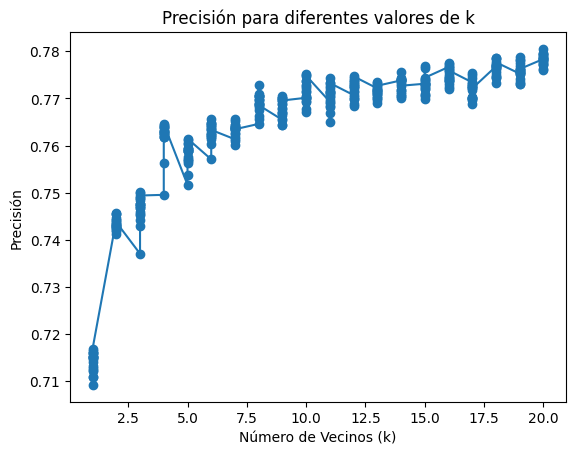

El número óptimo de vecinos es: 20 con una precision de: 0.7804913865489834 con Folds de: 19


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Lista para almacenar las puntuaciones de precisión
precisions = []
cvs = []
ks = []
inertia = []
# Probar diferentes valores de k
valores_k = range(1, 21)
valores_cv = range(2, 21)
for k in valores_k:
    for cv in valores_cv:
      knn = KNeighborsClassifier(n_neighbors=k)
      scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
      precisions.append(scores.mean())
      cvs.append(cv)
      ks.append(k)

# Graficar los resultados
plt.plot(ks, precisions, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.title('Precisión para diferentes valores de k')
plt.show()

# Encontrar el valor de k con la mayor precisión
k_optimo = ks[precisions.index(max(precisions))]
cv_optimo = cvs[precisions.index(max(precisions))]
print(f'El número óptimo de vecinos es: {k_optimo} con una precision de: {max(precisions)} con Folds de: {cv_optimo}')

In [ ]:
# Encuentra los índices de los 10 valores más altos de precisions
top_10_indices = np.argsort(precisions)[-10:]

# Obtén los valores correspondientes de cvs y ks
cvs_top_10 = [cvs[i] for i in top_10_indices]
ks_top_10 = [ks[i] for i in top_10_indices]

# Calcula la media de estos valores
cvs_mean = np.mean(cvs_top_10)
ks_mean = np.mean(ks_top_10)

print(f'La media de los Folds o iteraciones para los 10 valores más altos de precision es: {cvs_mean}')
print(f'La media de los valores de k-vecinos para los 10 valores más altos de precision es: {ks_mean}')

La media de los Folds o iteraciones para los 10 valores más altos de precision es: 11.3
La media de los valores de k-vecinos para los 10 valores más altos de precision es: 19.5


Con Kfold = 10 (10 iteraciones) aumenta el tiempo de procesamiento y tambien aumenta los vecino optimos (a 20), la precisión si mejora pero en un 0.001

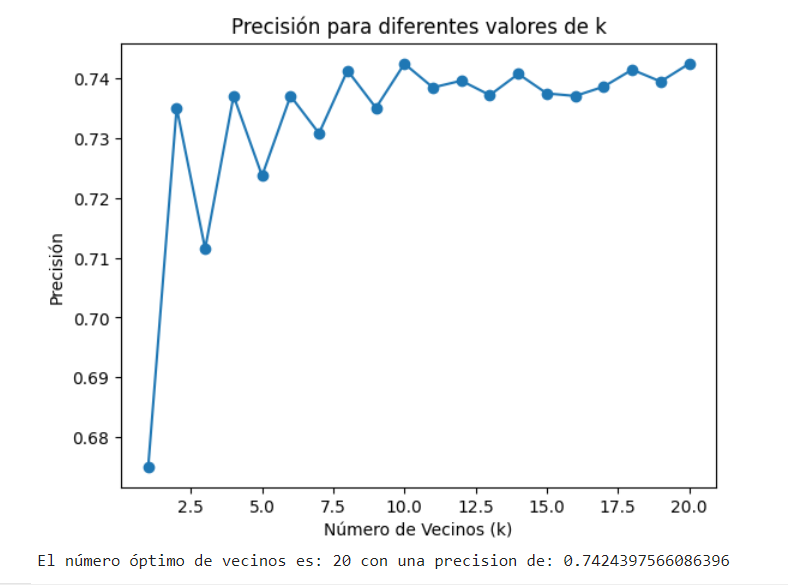

In [ ]:
# Lista para almacenar las puntuaciones de precisión
precisions = []
#Indicando los vecinos y los iteraciones mejores encontrados en el anterior (19 y 11)
knn = KNeighborsClassifier(n_neighbors=19)
scores = cross_val_score(knn, X, y, cv=11, scoring='accuracy')
precisions.append(scores.mean())

print(f'Accuracy: {max(precisions)} ')

Accuracy: 0.776229213941285 


###KNN con una validación bootstrap con 19 vecinos (Encontrados en el anterior)

In [ ]:
from sklearn.metrics import mean_squared_error

# Entrenar el modelo con 18  vecinos
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(X_train_bootstrap, y_train_bootstrap)

# Predecir en el conjunto de prueba
knn_predictions = knn_model.predict(X_test_bootstrap)

# Evaluar el modelo
accuracy = accuracy_score(y_test_bootstrap, knn_predictions)
print(f"Accuracy of K-Nearest Neighbors (k=19): {accuracy}")

Accuracy of K-Nearest Neighbors (k=19): 0.7792760823278921


## **Feed-Forward Neural Networks**


In [ ]:
!pip install keras

Utilizando validación cruzada con 10 k folds

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.metrics import Accuracy
import time
from sklearn.metrics import accuracy_score,classification_report
from keras.utils import to_categorical

#Para calcular el costo computacional
tiempo_i = time.time()

#Complete el código para crear la red neuronal artificial.
#Para la configuración de la arquitectura de la red tome como base lo que
#se pide en la tabla que encuentra despuéés de esta celda de código.
#Recuerde usar la función de activación SoftMax en la capa de salida. Para la capa oculta puede usar
#ReLu, tanh o sigmoid; se recomienda ReLu)
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='softmax'))

#Implemetamos la metodología de validación cross validation con 10 folds


kf = KFold(n_splits=10, shuffle=True)
j = 0
accuracy_scores = []

for train_index, test_index in kf.split(X):

    X_train_vc, X_test_vc= X.iloc[train_index],X.iloc[test_index]

    # Convertir las etiquetas a una representación one-hot encoding
    y_train_vc, y_test_vc = y[train_index], y[test_index]

    #Compilar el modelo
    #Usar el optimizador Adam
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Entrenar el modelo
    model.fit(X_train_vc, y_train_vc, epochs=10, batch_size=32, verbose=0)

    #Validación del modelo
    y_pred = model.predict(X_test_vc)

    y_pred2 = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test_vc, y_pred2)
    accuracy_scores.append(accuracy)
    j+=1
    print (j)

mean_accuracy = np.mean(accuracy_scores)
print(f"Accuracy promedio: {mean_accuracy}")

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i)+ " segundos.")

23/23 [==============================] - 0s 3ms/step
1
23/23 [==============================] - 0s 1ms/step
2
23/23 [==============================] - 0s 1ms/step
3
22/22 [==============================] - 0s 3ms/step
4
22/22 [==============================] - 0s 2ms/step
5
22/22 [==============================] - 0s 5ms/step
6
22/22 [==============================] - 0s 2ms/step
7
22/22 [==============================] - 0s 2ms/step
8
22/22 [==============================] - 0s 1ms/step
9
22/22 [==============================] - 0s 1ms/step
10
Accuracy promedio: 0.7346333010960672


Tiempo total de ejecución: 63.123459815979004 segundos.


In [ ]:
#Para calcular el costo computacional
tiempo_i = time.time()

#Complete el código para crear la red neuronal artificial.
#Para la configuración de la arquitectura de la red tome como base lo que
#se pide en la tabla que encuentra despuéés de esta celda de código.
#Recuerde usar la función de activación SoftMax en la capa de salida. Para la capa oculta puede usar
#ReLu, tanh o sigmoid; se recomienda ReLu)
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_bootstrap, y_train_bootstrap, epochs=10, batch_size=32, verbose=0)

    #Validación del modelo
y_pred = model.predict(X_test_bootstrap)

y_pred2 = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_bootstrap, y_pred2)


print(f"Accuracy promedio: {np.mean(accuracy)}")

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i)+ " segundos.")

45/45 [==============================] - 0s 1ms/step
Accuracy promedio: 0.7352732434350603


Tiempo total de ejecución: 6.294052839279175 segundos.


## **RANDOM FOREST**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Con validación cruzada 10 kfolds y iteracciones de arboles entre 10 a 45

In [ ]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10)
#Se realiza un for con cantidad de arboles empieza desde 10 hasta 45 de a 5
for B in range(10,50,5):

    Errores = np.zeros(10)
    j = 0
    #Aplicando la metodología de validación

    for train_index, test_index in kf.split(X):

        X_train_vc, X_test_vc = X.iloc[train_index], X.iloc[test_index]
        y_train_vc, y_test_vc = y[train_index], y[test_index]

        #para clasificar y entrenandolo solo con las muestras de entrenamiento

        clf = RandomForestClassifier(n_estimators=B)
        clf.fit(X_train_vc, y_train_vc)

        #Complete el código aquí prediciendo la clase para las muestras de validación de la base de datos
        Y_est = clf.predict(X_test_vc)

        Errores[j] = accuracy_score(Y_est, y_test_vc)
        j += 1

    print('\nResultado de clasificación con ', B, 'árboles:')
    print ("accuracy: " + str(np.mean(Errores)))


Resultado de clasificación con  10 árboles:
accuracy: 0.7846097275951

Resultado de clasificación con  15 árboles:
accuracy: 0.7810602030947776

Resultado de clasificación con  20 árboles:
accuracy: 0.7887272324306899

Resultado de clasificación con  25 árboles:
accuracy: 0.7861698098001291

Resultado de clasificación con  30 árboles:
accuracy: 0.7929835589941974

Resultado de clasificación con  35 árboles:
accuracy: 0.7941209300451322

Resultado de clasificación con  40 árboles:
accuracy: 0.7961075515796261

Resultado de clasificación con  45 árboles:
accuracy: 0.793126611863314


Con validación Bootstrap

In [ ]:
kf = KFold(n_splits=10)
#Se realiza un for con cantidad de arboles empieza desde 10 hasta 45 de a 5
for B in range(10,50,5):
        #para clasificar y entrenandolo solo con las muestras de entrenamiento

  clf = RandomForestClassifier(n_estimators=B)
  clf.fit(X_train_bootstrap, y_train_bootstrap)

        #Complete el código aquí prediciendo la clase para las muestras de validación de la base de datos
  Y_est = clf.predict(X_test_bootstrap)

  print('\nResultado de clasificación con ', B, 'árboles:')
  print ("accuracy: " + str(np.mean(accuracy_score(Y_est, y_test_bootstrap))))


Resultado de clasificación con  10 árboles:
accuracy: 0.7927608232789212

Resultado de clasificación con  15 árboles:
accuracy: 0.7877927608232789

Resultado de clasificación con  20 árboles:
accuracy: 0.7906316536550745

Resultado de clasificación con  25 árboles:
accuracy: 0.8026969481902059

Resultado de clasificación con  30 árboles:
accuracy: 0.801277501774308

Resultado de clasificación con  35 árboles:
accuracy: 0.8019872249822569

Resultado de clasificación con  40 árboles:
accuracy: 0.7984386089425124

Resultado de clasificación con  45 árboles:
accuracy: 0.794180269694819


## **Modelo de Máquinas de Vectores de Soporte (Support Vector Machines - SVM):**

Utilizando validación cruzada

In [ ]:
C = 1
gamma = 0.1
kernel = 'poly'

# Inicializar el modelo SVM con los parámetros
svm_model = SVC(decision_function_shape='ovr',C=C, gamma=gamma, kernel=kernel)

# Modelo SVM
print("\nSupport Vector Machines (SVM) Metrics:")
# Validación cruzada de k-fold (k=5)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcular el rendimiento mediante validación cruzada
cross_val_scores = cross_val_score(svm_model, X, y, cv=k_fold, scoring='accuracy')

# Imprimir resultados de validación cruzada

print(f"\nResultados de Validación Cruzada (Accuracy): {cross_val_scores}")
print(f"Accuracy Promedio: {cross_val_scores.mean():.4f}")
print(f"Desviación Estándar: {cross_val_scores.std():.4f}")


Support Vector Machines (SVM) Metrics:

Resultados de Validación Cruzada (Accuracy): [0.7787234  0.78297872 0.77163121 0.76278409 0.765625   0.79545455
 0.72443182 0.77698864 0.76278409 0.75284091]
Accuracy Promedio: 0.7674
Desviación Estándar: 0.0184


Utilizando Bootstrap

In [ ]:
from sklearn.svm import SVC

C = 1
gamma = 0.1
kernel = 'poly'

# Inicializar el modelo SVM con los parámetros
svm_model = SVC(decision_function_shape='ovr',C=C, gamma=gamma, kernel=kernel)

svm_model.fit(X_train_bootstrap, y_train_bootstrap)

# Evaluar el modelo
svm_accuracy = svm_model.score(X_test_bootstrap, y_test_bootstrap)
print(f"Accuracy of Support Vector Machines: {svm_accuracy}")

Accuracy of Support Vector Machines: 0.7892122072391767
